### 1) Design a single-unit perceptron for binary classification

In [ ]:
import numpy as np

# Step function for binary output
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Add 1 for the bias
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # Add bias column
        X = np.c_[X, np.ones(X.shape[0])]
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi[:-1]))
                self.weights += update * xi

    def predict(self, X):
        # Add bias column if necessary
        if X.ndim == 1:  # Single sample
            X = np.append(X, 1)  # Add bias term
        else:
            X = np.c_[X, np.ones(X.shape[0])]  # Add bias for all samples
        return step_function(np.dot(X, self.weights))

# Data: OR, AND, XOR
datasets = {
    "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
    "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
    "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])),
}

# Train and test the fixed perceptron
results = {}
for key, (X, y) in datasets.items():
    perceptron = Perceptron(input_size=2, lr=0.1, epochs=1000)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    results[key] = predictions

results


{'OR': array([0, 1, 1, 1]),
 'AND': array([0, 0, 0, 1]),
 'XOR': array([1, 1, 0, 0])}

Problem with single perceptron - cannot correctly predict XOR, the perceptron gives the output for XOR as 'XOR': array([1, 1, 0, 0]) instead of [0, 1, 1, 0].

Why?
A single perceptron cannot correctly predict non-linearly separable data

### 2) Use Perceptron from sklearn

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Train and test using sklearn's Perceptron
results_sklearn = {}
for key, (X, y) in datasets.items():
    model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    model.fit(X, y)
    predictions = model.predict(X)
    results_sklearn[key] = {
        "predictions": predictions,
        "accuracy": accuracy_score(y, predictions),
    }

results_sklearn


{'OR': {'predictions': array([0, 1, 1, 1]), 'accuracy': 1.0},
 'AND': {'predictions': array([0, 0, 0, 1]), 'accuracy': 1.0},
 'XOR': {'predictions': array([0, 0, 0, 0]), 'accuracy': 0.5}}

Problem in this - again when we use the perceptron from sklearn library it is not able to correctly predict the XOR results (same as our own defined perceptron class).

Again proving that a single perceptron cannot give predictions for non-linearly separable data correctly.

## 3) Multiclass Classification: MNIST Dataset

### Algorithm: Feedforward Neural Network (SimpleNN)
The model used in this code is a feedforward neural network (FNN), which is a type of artificial neural network where connections between the nodes do not form a cycle. It consists of the following layers:

**Input Layer:**

The input is a 28x28 pixel grayscale image (MNIST dataset), flattened into a 1D vector of size 784 (28 * 28 = 784).

**Hidden Layer:**

A fully connected (dense) layer with 128 neurons. Each input is connected to each neuron in this layer. The activation function used in this layer is ReLU (Rectified Linear Unit), which introduces non-linearity into the model. This is crucial for learning complex patterns.

**Output Layer:**

A fully connected layer with 10 output neurons, corresponding to the 10 possible digits (0-9). The output layer uses Softmax (implicitly within the CrossEntropyLoss), which converts the raw output scores into probabilities. Each output represents the probability of the image belonging to one of the classes (digits).

**Forward Propagation:**

The input is passed through the layers sequentially, and the output of each layer is used as the input to the next layer. The final output layer gives a probability distribution over the 10 classes.

### Hyperparameters :

**Learning Rate (lr = 0.001)**: Controls the step size during optimization, balancing fast convergence with stability.

**Batch Size (64)**: Defines how many samples are processed together before the model’s weights are updated.

**Optimizer (Adam)**: An adaptive optimization algorithm that adjusts the learning rate for each parameter based on past gradients.

**Loss Function (Cross-Entropy Loss)**: Measures the difference between predicted and actual class labels for classification tasks.

**Activation Function (ReLU)**: Introduces non-linearity by outputting the input if positive, or zero otherwise.

**Epochs (50)**: The number of times the entire training dataset is passed through the network during training.

Using device: cuda
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:10<00:00, 904kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.11MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.65MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

MNIST Dataset Analysis:
Number of Samples: 60000
Number of Features: 784 (28x28 pixels)
Number of Classes: 10
Class Distribution:
  Class 0: 5923 samples
  Class 1: 6742 samples
  Class 2: 5958 samples
  Class 3: 6131 samples
  Class 4: 5842 samples
  Class 5: 5421 samples
  Class 6: 5918 samples
  Class 7: 6265 samples
  Class 8: 5851 samples
  Class 9: 5949 samples


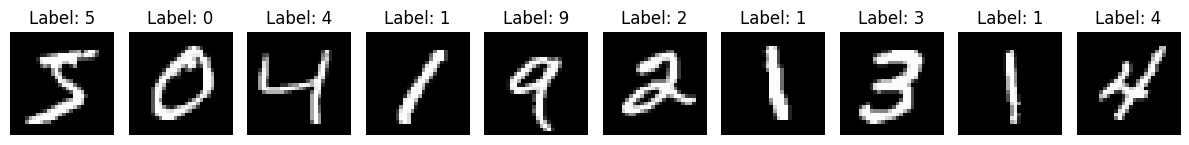

In [ ]:
# Exploring MNIST dataset

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Move data to GPU
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=len(mnist_train), shuffle=False)
data_iter = iter(data_loader)
images, labels = next(data_iter)

# Move to GPU
images, labels = images.to(device), labels.to(device)

# Analyze the dataset
num_samples = len(labels)
num_features = images[0].numel()
num_classes = len(torch.unique(labels))
class_distribution = {label.item(): (labels == label).sum().item() for label in torch.unique(labels)}

# Display dataset information
print("MNIST Dataset Analysis:")
print(f"Number of Samples: {num_samples}")
print(f"Number of Features: {num_features} (28x28 pixels)")
print(f"Number of Classes: {num_classes}")
print("Class Distribution:")
for label, count in class_distribution.items():
    print(f"  Class {label}: {count} samples")

# Visualize a few samples from the dataset
def visualize_samples(images, labels, num_samples=10):
    images, labels = images[:num_samples].cpu(), labels[:num_samples].cpu()  # Move to CPU for visualization
    plt.figure(figsize=(12, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(0), cmap="gray")
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visualize samples
visualize_samples(images, labels)


Using device: cuda
Epoch 1/50, Loss: 0.3516, Train Accuracy: 90.57%, Test Accuracy: 94.30%
Epoch 2/50, Loss: 0.1621, Train Accuracy: 95.33%, Test Accuracy: 96.25%
Epoch 3/50, Loss: 0.1092, Train Accuracy: 96.85%, Test Accuracy: 97.07%
Epoch 4/50, Loss: 0.0824, Train Accuracy: 97.61%, Test Accuracy: 97.25%
Epoch 5/50, Loss: 0.0644, Train Accuracy: 98.12%, Test Accuracy: 97.46%
Epoch 6/50, Loss: 0.0514, Train Accuracy: 98.47%, Test Accuracy: 97.47%
Epoch 7/50, Loss: 0.0419, Train Accuracy: 98.77%, Test Accuracy: 97.89%
Epoch 8/50, Loss: 0.0341, Train Accuracy: 98.98%, Test Accuracy: 97.89%
Epoch 9/50, Loss: 0.0275, Train Accuracy: 99.25%, Test Accuracy: 97.71%
Epoch 10/50, Loss: 0.0232, Train Accuracy: 99.36%, Test Accuracy: 97.90%
Epoch 11/50, Loss: 0.0190, Train Accuracy: 99.48%, Test Accuracy: 97.95%
Epoch 12/50, Loss: 0.0160, Train Accuracy: 99.56%, Test Accuracy: 97.83%
Epoch 13/50, Loss: 0.0130, Train Accuracy: 99.67%, Test Accuracy: 97.48%
Epoch 14/50, Loss: 0.0110, Train Accuracy

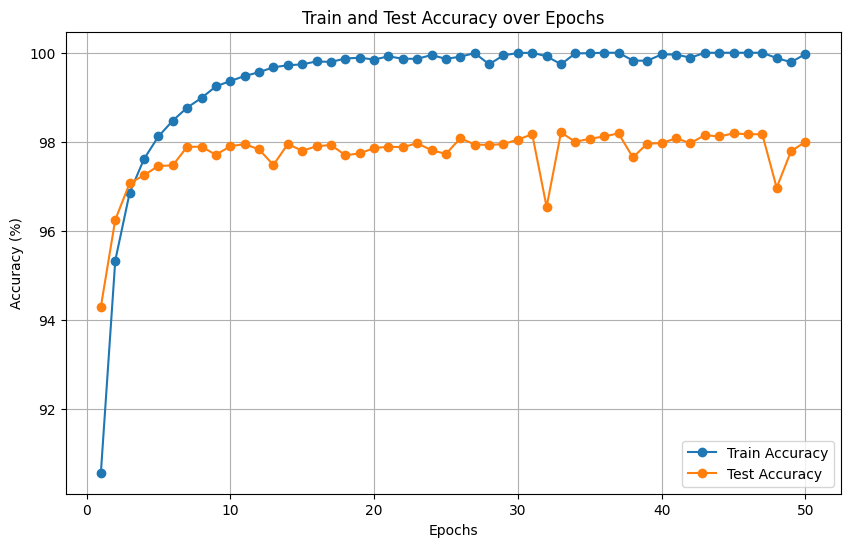

Final Test Accuracy: 98.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer to hidden layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(128, 10)  # Hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input images
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Data transformation
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Prepare data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Instantiate the model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Update the test function to return accuracy
def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Update the training function to calculate and store accuracy
def train_with_accuracy(model, train_loader, criterion, optimizer, device, epochs=50):
    model.train()
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Store metrics
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Test accuracy after every epoch
        test_accuracy = test(model, test_loader, device)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, train_accuracies, test_accuracies

# Train the model and get accuracies
epochs = 50
train_losses, train_accuracies, test_accuracies = train_with_accuracy(
    model, train_loader, criterion, optimizer, device, epochs=epochs
)

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", marker="o")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", marker="o")
plt.title("Train and Test Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# Final test
final_test_accuracy = test(model, test_loader, device)
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")


#### Conclusion

The model achieves nearly 100% training accuracy, with test accuracy stabilizing around 97-98%, indicating good generalization without overfitting. The consistent decrease in loss and high test accuracy suggest the model is effectively learning and performing well on unseen data.